<h1>Procesamiento de lenguaje natural aplicado al análisis de opinión política para las elecciones presidenciales en Colombia 2022<span class="tocSkip"></span></h1> 

>**Maestría en Analítica de Datos**  
>**Facultad de Ingeniería y Ciencias Básicas.**  
>**Universidad Central**  
>**Integrantes del trabajo:**  
>- Maria Alejandra Castillo Pabón
>- David Alejandro Ballesteros Díaz

# Librerias
Las librerías que se utilizan para la limpieza y transformación de los datos son:

In [27]:
'''Instalación de librerías'''
#!pip install nltk
#!pip install wordcloud
#!pip install pyvis
#!pip install plotly
#!pip install --upgrade PyGitHub

'''Importación de librerías'''
import pyvis
from pyvis.network import Network
import numpy as np
from github import Github
import plotly.express as px
import pandas as pd
import glob
import re
from PIL import Image
import requests
from io import BytesIO
# from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# import spacy
# from spacy.lang.es import STOP_WORDS
# import seaborn as sns
from scipy.spatial.distance import cosine

# Funciones personalizadas
Se crean las funciones personalizadas para la limpieza y transformación de los datos:

## Consolidar dataframe
Función que permite consolidar todos los archivos que contienen tweets de un candidato específico.

In [2]:
def consolidar(ruta,clave):
    df=pd.DataFrame()
    lista=[file_name for file_name in glob.glob(ruta+'/'+'*.csv') if file_name.find(clave) > 0]
    print(lista)
    for archivo in lista:
        print (archivo)
        df0= pd.read_csv(archivo,sep=",",index_col=False)
        df=pd.concat([df0, df])
    return(df)

## Tranformar texto de miles
Función que permite reemplazar las letras que representan el "mil" por los ceros correspondientes.

In [3]:
def valor_k(x):
    x=str(x)
    if x.find(".")>0 or x.find(",")>0:
        x=int(re.sub('[.,k,K,\s,a-zA-Z]','',x))*100
    elif x =='nan':
        x=0
    elif x.find("K") >0 or x.find("mil") >0:
        x=int(re.sub('[k,K\s,a-zA-Z]','',x))*1000
    else:
        x= int(x)
    return(x)

## Separar usuarios mencionados
Función que permite extraer los usuarios que son mencionados dentro del texto (por ejemplo @usuario) y lo almacena en una columna nueva.

In [4]:
def mencion(texto):
    nuevo_texto =str(texto)
    if nuevo_texto is None:
        pass
    else:
        try:
            nuevo_texto = texto.lower()
        except:
            pass
        regex = '@[a-z0-9\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\-\\/\\:\\;\\<\\=\\>\\?\\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\¡\\¿]+'
        nuevo_texto=re.findall(regex, nuevo_texto)
        return(nuevo_texto)

## Limpiar carateres especiales
Función que permite realizar la limpieza del texto.

In [5]:
def limpiar(texto):
    nuevo_texto =str(texto)
    if nuevo_texto is None:
        pass
    else:
        try:
            nuevo_texto = texto.lower()
        except:
            pass
        nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
        #regex = '@[a-z0-9\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\-\\/\\:\\;\\<\\=\\>\\?\\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\¡\\¿]+(\s)'
        regex = '@[a-z0-9\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\-\\/\\:\\;\\<\\=\\>\\?\\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\¡\\¿]+'
        nuevo_texto = re.sub(regex , ' ', nuevo_texto)
        regex = '[\\!\\"\\“\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\-\\/\\:\\;\\<\\=\\>\\?\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\¡\\¿\\.\\,\\·]'
        nuevo_texto = re.sub(regex , ' ', nuevo_texto)
        nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
        nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
        nuevo_texto=nuevo_texto.replace("replying to", "")
        nuevo_texto=nuevo_texto.replace("Replying to", "")
    return(nuevo_texto)

## Guardar Dataframe - CSV
Función que permite guardar el dataframe limpio en formato CSV.

In [6]:
def guardar_csv (df,nombre_archivo):
    df.to_csv(nombre_archivo+'.csv', index=False,encoding='utf-8')
    return('El archivo '+nombre_archivo+'.csv fue guardado exitosamente')

## Words Cloud
Función que permite generar una nube de las palabras que más se repiten en un texto determinado para posteriormente generar el gráfico "words cloud".

In [7]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [8]:
response = requests.get("https://raw.githubusercontent.com/malejacp4/ProyectoGrado/main/datos/datos_procesados/Tweet.png")
tweet_mask= np.array (Image.open(BytesIO(response.content)))
tweet_mask_new = np.ndarray((tweet_mask.shape[0],tweet_mask.shape[1]), np.int32)

for i in range(len(tweet_mask)):
    tweet_mask_new[i] = list(map(transform_format, tweet_mask[i]))

In [9]:
def lluvia(df,texto,lista):
    lista=lista
    stop_words = list(stopwords.words(['spanish','english']))
    stop_words.extend(("jul","agost","oct","jun","tweet","com","quote","cita","nov","aug","may","citar","q","ago","si","pm","años","Colombia","país","colombia","and",".",",","que","twitter","va","co","www","others","día","hoy","show","hace","hacer","youtube","facebook","año","quieren","viernes","días","vale","solo","bogotá","duque","dec","así","cómo","sep","sino","thread","toda","debe","columna","ésta","eltiempo","sido","cómo","toda","parte","alaire","hora","página","media","revista semana","próximo"))
    stop_words.extend((lista))
    df=df.dropna()
    text = ' '.join(df) 
    wordcloud = WordCloud(width=1024,height=800,background_color="white", mask=tweet_mask_new,min_font_size=14,contour_width=10,stopwords=stop_words, contour_color='#22A0F3').generate(text)
    wordcloud.to_file(texto+".png")
    plt.figure(figsize= (8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off') 
    plt.tight_layout(pad = 0) 
    return (plt.show())


## Lematización de Texto

Función que permite identificar el lema o raíz de de una palabra.

In [28]:
def lemmatizer(text):  
  doc = nlp(text)
  return ' '.join([word.lemma_ for word in doc])

# Limpieza y Consolidación

## Consolidación Entorno
Teniendo en cuenta que la extacción de los datos se generó más de un archivo con la información de un candidato, se hace necesario consolidar ésta información en un solo dataframe. Como resultado de éste proceso, se generarán 5 dataframe, uno por cada candidato (Óscar Ivan Zuliaga, María Fernanda Cabal, Rodolfo Hernandéz, Gustavo Petro y Sergio Fajardo) 

In [13]:
g = Github()
repo = g.get_repo("malejacp4/ProyectoGrado")
contenido = repo.get_contents("datos/datos_sin_procesar")

In [14]:
def consolidar(contenido,ruta,clave,usuarios):
    df=pd.DataFrame()
    for archivo in contenido:
        if clave in str(archivo):
            for usuario in usuarios:
                if usuario in str(archivo):          
                    archivo = str(archivo)
                    archivo = archivo.replace('ContentFile(path="', '').replace('")', '')
                    df0= pd.read_csv(ruta+archivo,index_col=False)
                    df0['usuario']=usuario
                    df=pd.concat([df0, df])
    return(df)


In [15]:
clave='entorno'
ruta='https://raw.githubusercontent.com/malejacp4/ProyectoGrado/main/'
usuarios=("OIZuluaga","MariaFdaCabal","ingrodolfohdez","petrogustavo","sergio_fajardo")
df=consolidar(contenido,ruta,clave,usuarios)
df=df.drop_duplicates(['id', 'nombre','usuario'], keep='last')
df0 = df['id'].value_counts()
df0=pd.DataFrame(df0, columns=['id','conteo']).reset_index()
df0.drop(columns="conteo", inplace=True)
df0=df0.rename(columns={"index": "id", "id": "conteo"})
df1 = df.merge(df0, left_on="id", right_on="id", how='left')
df2= pd.read_csv('https://raw.githubusercontent.com/malejacp4/ProyectoGrado/main/datos/datos_sin_procesar/clasificacion_usuarios.csv' ,index_col=False,encoding='latin')
df1= df1.merge(df2[["id","grupo"]], left_on="id", right_on="id", how='left')
guardar_csv(df1,"entorno_consolidado")

'El archivo entorno_consolidado.csv fue guardado exitosamente'

## Limpieza Tweets
Se realiza la limpieza del texto para cada uno de los dataframe generados en el paso anterior y posteriormente se generan 5 nuevos dataframe.

In [16]:
clave='tw_'
ruta='https://raw.githubusercontent.com/malejacp4/ProyectoGrado/main/'
usuarios=("OIZuluaga","MariaFdaCabal","ingrodolfohdez","petrogustavo","sergio_fajardo")
df=consolidar(contenido,ruta,clave,usuarios)
df['cantidad_comentarios']=df['cantidad_comentarios'].apply(valor_k)
df['cantidad_likes']=df['cantidad_likes'].apply(valor_k)
df['Cantidad_Retweets']=df['Cantidad_Retweets'].apply(valor_k)
df['mencion']=df['texto'].apply(mencion)
df['texto']=df['texto'].apply(limpiar)
guardar_csv (df,"df_tweets_consolidado_candidatos")
for usuario in usuarios:
    df0= df[df['usuario'] == usuario]
    guardar_csv (df0,"df_tweets_consolidado_"+usuario)
    

## Carga de Archivos

In [24]:
url="https://raw.githubusercontent.com/malejacp4/ProyectoGrado/main/datos/datos_procesados/df_tweets_consolidado_OIZuluaga.csv"
dfzuluaga= pd.read_csv(url,sep=",")
url="https://raw.githubusercontent.com/malejacp4/ProyectoGrado/main/datos/datos_procesados/df_tweets_consolidado_petrogustavo.csv"
dfpetro= pd.read_csv(url,sep=",")
url="https://raw.githubusercontent.com/malejacp4/ProyectoGrado/main/datos/datos_procesados/df_tweets_consolidado_sergio_fajardo.csv"
dfsergio= pd.read_csv(url,sep=",")
url="https://raw.githubusercontent.com/malejacp4/ProyectoGrado/main/datos/datos_procesados/df_tweets_consolidado_MariaFdaCabal.csv"
dfcabal= pd.read_csv(url,sep=",")
url="https://raw.githubusercontent.com/malejacp4/ProyectoGrado/main/datos/datos_procesados/df_tweets_consolidado_ingrodolfohdez.csv"
dfrodolfo= pd.read_csv(url,sep=",")

## Nube de Palabras
Se crea una nube de palabras más utilizadas en los tweets generados por cada candidato. Se decide eliminar en cada nube el nombre del candidato objeto de análisis. 

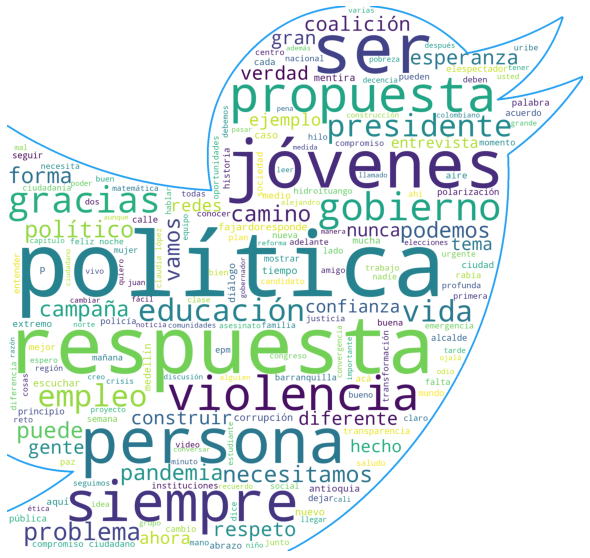

None


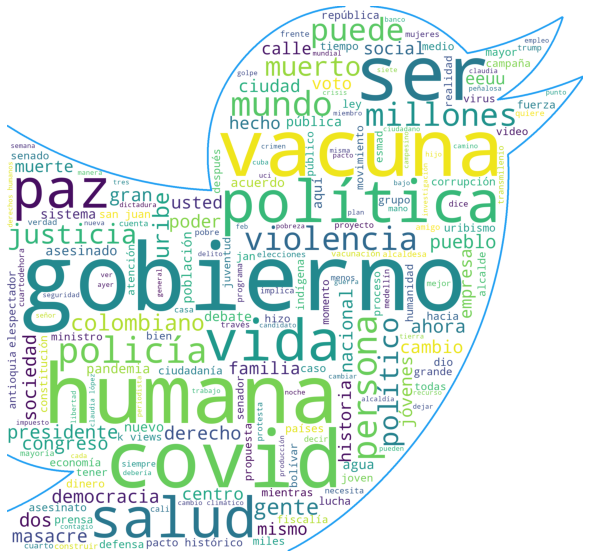

None


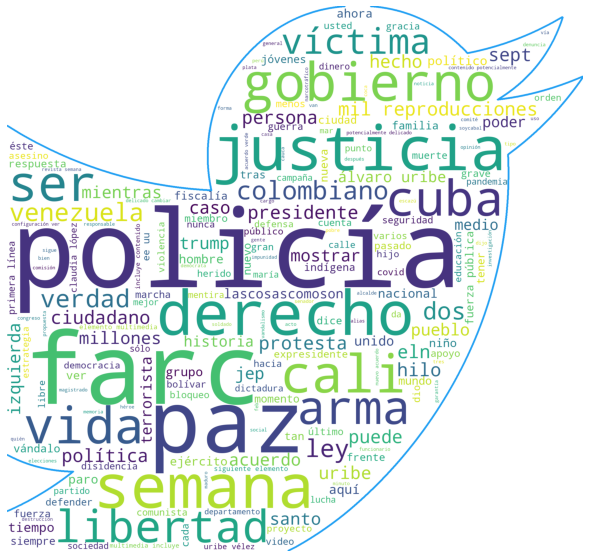

None


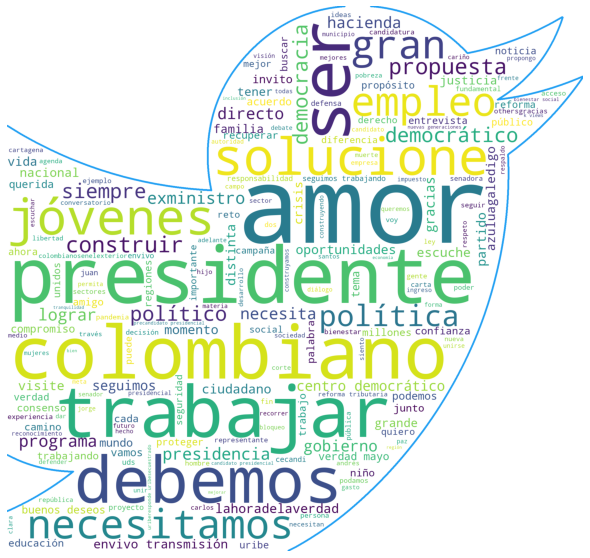

None


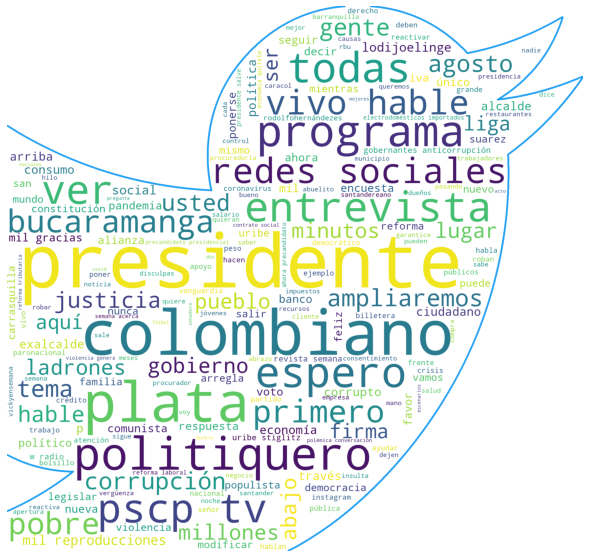

None


In [25]:
lista= ["sergio", "fajardo", "sergio fajardo","sergiofajardo","petro","gustavo petro","gustavo","cabal","maria fernanda","mariafernandacabal","maria","fernanda","zuluaga","iván zuluaga","óscar iván","ingrorodolfo","ingeniero","ing","rodolfo hernández", "rodolfo","hernández","hernandez","ingrodolfohdez","ingrodolfo","lunes","sr","vez","óscar","iván"]
print(lluvia(dfsergio['texto'],'fajardo_palabras',lista))
print(lluvia(dfpetro['texto'],'petro_palabras',lista))
print(lluvia(dfcabal['texto'],'cabal_palabras',lista))
print(lluvia(dfzuluaga['texto'],'zuluaga_palabras',lista))
print(lluvia(dfrodolfo['texto'],'rodolfo_palabras',lista))

# Análisis Exploratorio

Para el análisis explotario se realiza el cargue del modelo en español "es_core_news_md" de la librería de spacy, con el fin de poder tokenizar el texto y relizar un conteo de palabras e identificación de palabras más usados en los discursos de cada candidato.

In [59]:
nlp = spacy.load("es_core_news_md")

## Cargue de Dataframe

En pasos anteriores ya se ha realizado el cargue de los dataframe que contienen los tweets escritos por los candidatos, los datos de estos dataframe ya han sido previamente limpiados. Acontinuación se eliminan los registros que contienen datos nulos ya que no aportan información relevante para el estudio. 

In [57]:
dfzuluaga=dfzuluaga[dfzuluaga['nombre']== 'Óscar Iván Zuluaga']
dfzuluaga = dfzuluaga[dfzuluaga['texto'].notna()]
dfpetro = dfpetro[dfpetro['texto'].notna()]
dfsergio = dfsergio[dfsergio['texto'].notna()]
dfcabal = dfcabal[dfcabal['texto'].notna()]
dfrodolfo = dfrodolfo[dfrodolfo['texto'].notna()]

# Conteo de Tweets por cada candidato
print('Número de tweets Óscar Iván Zuluaga: ' + str(dfzuluaga.shape[0]))
print('Número de tweets Gustavo Petro: ' + str(dfpetro.shape[0]))
print('Número de tweets Sergio Fajardo: ' + str(dfsergio.shape[0]))
print('Número de tweets Maria Fernanda Cabal: ' + str(dfcabal.shape[0]))
print('Número de tweets Rodolfo Hernández: ' + str(dfrodolfo.shape[0]))

Número de tweets Óscar Iván Zuluaga: 407
Número de tweets Gustavo Petro: 2965
Número de tweets Sergio Fajardo: 612
Número de tweets Maria Fernanda Cabal: 1353
Número de tweets Rodolfo Hernández: 308


## Tokenización y Lematización de Texto

Se tokeniza el texto de los tweets generados por los candidatos, con el fin de dividir el texto en palabras, por otra parte se lematiza el texto para identificar la forma y lema de las palabra. Tanto el token como el lematizado, se guardan en variables independientes.

In [60]:
dfzuluaga['texto_tokenizado'] =dfzuluaga['texto'].apply(lambda x: nlp(x))
dfzuluaga['lematizado'] = dfzuluaga['texto'].apply(lambda x: lemmatizer(x))

dfpetro['texto_tokenizado'] =dfpetro['texto'].apply(lambda x: nlp(x))
dfpetro['lematizado'] = dfpetro['texto'].apply(lambda x: lemmatizer(x))

dfsergio['texto_tokenizado'] =dfsergio['texto'].apply(lambda x: nlp(x))
dfsergio['lematizado'] = dfsergio['texto'].apply(lambda x: lemmatizer(x))

dfcabal['texto_tokenizado'] =dfcabal['texto'].apply(lambda x: nlp(x))
dfcabal['lematizado'] = dfcabal['texto'].apply(lambda x: lemmatizer(x))

dfrodolfo['texto_tokenizado'] =dfrodolfo['texto'].apply(lambda x: nlp(x))
dfrodolfo['lematizado'] = dfrodolfo['texto'].apply(lambda x: lemmatizer(x))

C:\Users\malej\AppData\Local\Temp/ipykernel_1276/1745591382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpetro['texto_tokenizado'] =dfpetro['texto'].apply(lambda x: nlp(x))
C:\Users\malej\AppData\Local\Temp/ipykernel_1276/1745591382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpetro['lematizado'] = dfpetro['texto'].apply(lambda x: lemmatizer(x))
C:\Users\malej\AppData\Local\Temp/ipykernel_1276/1745591382.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

## Nube de Palabras (texto lematizado)

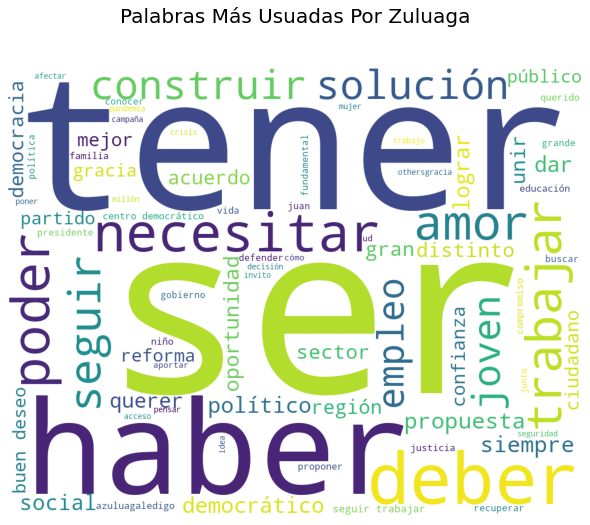

None


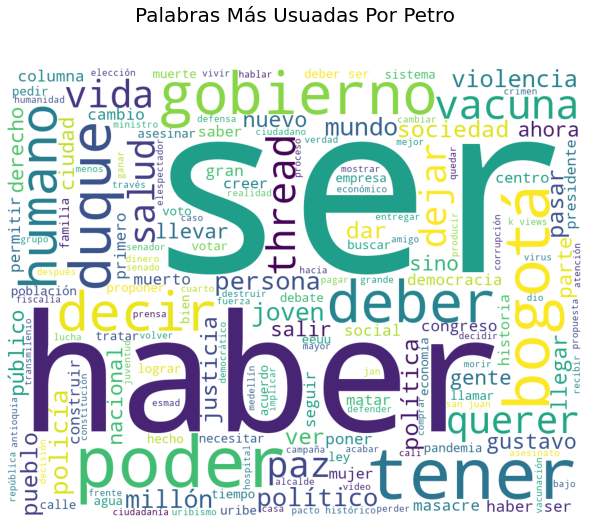

None


None


None


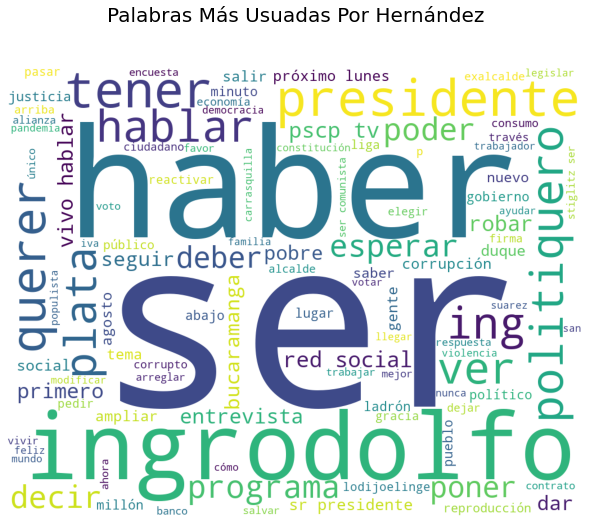

None


In [61]:
lista= ["hoy","others","twitter","sep","dec","vez","covid","petro","colombiano","colombia","señor","año","hora","mismo","ir","así","día","cada","dos","hacía","aquí","palabra","acá","algúno","sergio fajardo","fajardorespondir","fernanda cabal","solo","momento","mariafernandacabal","co","maria fernanda","fernanda cabal","fernanda","cabal","maria","mil","alguno","usted","sept","ingeniero","rodolfo hernández","mientras","tra","rodolfo hernández","rodolfo","hernández","hernandez"]
print(lluvia(dfzuluaga['lematizado'],'Palabras Más Usuadas Por Zuluaga',lista))
print(lluvia(dfpetro['lematizado'],'Palabras Más Usuadas Por Petro',lista))
print(lluvia(dfsergio['lematizado'],'Palabras Más Usuadas Por Fajardo',lista))
print(lluvia(dfcabal['lematizado'],'Palabras Más Usuadas Por Cabal',lista))
print(lluvia(dfrodolfo['lematizado'],'Palabras Más Usuadas Por Hernández',lista))

## Eliminación Stop Words

Se cargan las stop words en español que se encuentran definidas en la libreria de Spacy y se eliminan del texto tokenizado. Éstas palabras se eliminan ya que no aportan importancia para el análisis.  

In [75]:
tweetscandidatos = pd.concat([dfzuluaga, dfpetro, dfsergio,dfcabal,dfrodolfo]).reset_index(drop=True)
tweetscandidatos = tweetscandidatos.drop(['texto','emoticon','link','fecha'], axis=1)

In [76]:
stopwords = nlp.Defaults.stop_words
nlp.Defaults.stop_words |= {"colombia","que","a",".",",","y","·","...","“","com","”"," ","","hoy","others","twitter","sep","dec","vez","covid","petro","colombiano","colombia","señor","año","hora","mismo","ir","así","día","cada","dos","hacía","aquí","palabra","acá","algúno","sergio fajardo","fajardorespondir","fernanda cabal","solo","momento","mariafernandacabal","co","maria fernanda","fernanda cabal","fernanda","cabal","maria","mil","alguno","usted","sept","ingeniero","rodolfo hernández","mientras","tra","rodolfo hernández","rodolfo","hernández","hernandez","q","tweet","quote","ingrodolfo","sergio","fajardo","and","jul","país","citar","duque","may","this","presidente","bogotá","ing","@","show","gobierno","columna","hable","espero","seguimos","thread","o","necesitamos","semana"}
tweetscandidatos['token_stopword']=tweetscandidatos['texto_tokenizado'].apply(lambda x: [str(w) for w in x if not w.text in stopwords])
tweetscandidatos = tweetscandidatos.explode(column='token_stopword')

In [18]:
#guardar_csv (tweetscandidatos,"dfcandidatosconsolidado")
tweetscandidatos= pd.read_csv('dfcandidatosconsolidado.csv')

## Palabras totales por candidato

In [19]:
tweetscandidatos.groupby('nombre')['token_stopword'].count()

nombre
Gustavo Petro              71721
Ing Rodolfo Hernandez !     3149
María Fernanda Cabal       26512
Sergio Fajardo             10474
Óscar Iván Zuluaga          3521
Name: token_stopword, dtype: int64

## Palabras distintas por candidato

In [20]:
tweetscandidatos.groupby('nombre')['token_stopword'].nunique()

nombre
Gustavo Petro              17029
Ing Rodolfo Hernandez !     1628
María Fernanda Cabal        9112
Sergio Fajardo              4513
Óscar Iván Zuluaga          1768
Name: token_stopword, dtype: int64

## Top 5 palabras más usadas por candidato

In [21]:
tweetscandidatos.groupby(['nombre','token_stopword'])['token_stopword'] \
 .count() \
 .reset_index(name='count') \
 .groupby('nombre') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))

nombre token_stopword  count
nombre                                                                      
Gustavo Petro           8069             Gustavo Petro         humana    257
                        14430            Gustavo Petro          salud    245
                        12410            Gustavo Petro       política    243
                        14942            Gustavo Petro         social    213
                        11834            Gustavo Petro            paz    198
Ing Rodolfo Hernandez ! 17303  Ing Rodolfo Hernandez !    colombianos     29
                        18186  Ing Rodolfo Hernandez !          plata     26
                        18203  Ing Rodolfo Hernandez !   politiqueros     24
                        18628  Ing Rodolfo Hernandez !           vivo     23
                        18260  Ing Rodolfo Hernandez !       programa     23
María Fernanda Cabal    27269     María Fernanda Cabal          uribe    112
                        22197     María Fernanda Cabal           farc    112
                        23489     María Fernanda Cabal       justicia     93
                        24973     María Fernanda Cabal            paz     86
                        25249     María Fernanda Cabal        policía     80
Sergio Fajardo          31009           Sergio Fajardo       política     95
                        31469           Sergio Fajardo      respuesta     83
                        30194           Sergio Fajardo        jóvenes     60
                        29768           Sergio Fajardo        gracias     45
                        32130           Sergio Fajardo      violencia     44
Óscar Iván Zuluaga      32372       Óscar Iván Zuluaga           amor     35
                        32799       Óscar Iván Zuluaga    democrático     25
                        33257       Óscar Iván Zuluaga        jóvenes     24
                        33856       Óscar Iván Zuluaga     soluciones     24
                        32766       Óscar Iván Zuluaga        debemos     22

**Sergio Fajargo**

In [22]:
df=tweetscandidatos[tweetscandidatos.nombre == 'Sergio Fajardo']
df=df['token_stopword'].value_counts(ascending=False).head(5).to_frame()
fig = px.bar(x=df.token_stopword, y=df.index, orientation='h',color_discrete_sequence=["#22A0F3"],text=df.token_stopword,labels=dict(y="Palabras",x="conteo"))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.for_each_trace(lambda t: t.update(textfont_color="white"))
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.write_html("fajardo_palabras.html")
fig.show()

In [93]:
df=tweetscandidatos[tweetscandidatos.nombre == 'Óscar Iván Zuluaga']
df=df['token_stopword'].value_counts(ascending=False).head(5).to_frame()
fig = px.bar(x=df.token_stopword, y=df.index, orientation='h',color_discrete_sequence=["#22A0F3"],text=df.token_stopword,labels=dict(y="Palabras",x="conteo"))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.for_each_trace(lambda t: t.update(textfont_color="white"))
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.write_html("zuluaga_palabras.html")
fig.show()

In [94]:
df=tweetscandidatos[tweetscandidatos.nombre == 'Ing Rodolfo Hernandez !']
df=df['token_stopword'].value_counts(ascending=False).head(5).to_frame()
fig = px.bar(x=df.token_stopword, y=df.index, orientation='h',color_discrete_sequence=["#22A0F3"],text=df.token_stopword,labels=dict(y="Palabras",x="conteo"))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.for_each_trace(lambda t: t.update(textfont_color="white"))
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.write_html("rodolfo_palabras.html")
fig.show()

In [95]:
df=tweetscandidatos[tweetscandidatos.nombre == 'Gustavo Petro']
df=df['token_stopword'].value_counts(ascending=False).head(5).to_frame()
fig = px.bar(x=df.token_stopword, y=df.index, orientation='h',color_discrete_sequence=["#22A0F3"],text=df.token_stopword,labels=dict(y="Palabras",x="conteo"))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.for_each_trace(lambda t: t.update(textfont_color="white"))
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.write_html("petro_palabras.html")
fig.show()

In [96]:
df=tweetscandidatos[tweetscandidatos.nombre == 'María Fernanda Cabal']
df=df['token_stopword'].value_counts(ascending=False).head(5).to_frame()
fig = px.bar(x=df.token_stopword, y=df.index, orientation='h',color_discrete_sequence=["#22A0F3"],text=df.token_stopword,labels=dict(y="Palabras",x="conteo"))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.for_each_trace(lambda t: t.update(textfont_color="white"))
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.write_html("cabal_palabras.html")
fig.show()

## Correlación entre los candidatos
Se crea una matriz de correlación para identificar la similitud entre los perfiles de los candidatos, de acuerdo a las palabras que escriben. Para ésto se realiza una tabla pivóte con el fin de crear una columna para cada candidato; luego se crea una función para el cálculo de la similitud entre las palabras haciendo uso de la función coseno.  

In [25]:
tweetspivot = tweetscandidatos.groupby(["nombre","token_stopword"])["token_stopword"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token_stopword" , columns="nombre", values= "count")
tweetspivot.columns.name = None

In [28]:
def similitud_coseno(a,b):
    distancia = cosine(a,b)
    return 1-distancia
dfcorrelacion=tweetspivot.corr(method=similitud_coseno)
dfcorrelacion

Gustavo Petro  Ing Rodolfo Hernandez !  \
Gustavo Petro                 1.000000                 0.487791   
Ing Rodolfo Hernandez !       0.487791                 1.000000   
María Fernanda Cabal          0.726271                 0.516573   
Sergio Fajardo                0.640509                 0.490779   
Óscar Iván Zuluaga            0.544270                 0.511269   

                         María Fernanda Cabal  Sergio Fajardo  \
Gustavo Petro                        0.726271        0.640509   
Ing Rodolfo Hernandez !              0.516573        0.490779   
María Fernanda Cabal                 1.000000        0.591850   
Sergio Fajardo                       0.591850        1.000000   
Óscar Iván Zuluaga                   0.516587        0.590181   

                         Óscar Iván Zuluaga  
Gustavo Petro                      0.544270  
Ing Rodolfo Hernandez !            0.511269  
María Fernanda Cabal               0.516587  
Sergio Fajardo                     0.590181  
Óscar Iván Zuluaga                 1.000000

In [97]:
fig = px.imshow(dfcorrelacion,color_continuous_scale=['#f0eeef','#22a0f3'],text_auto=True)
fig.show()
fig.write_html("correlacion.html")


## Palabras comunes entre candidatos

In [30]:
petro = set(tweetscandidatos[tweetscandidatos.nombre == 'Gustavo Petro']['token_stopword'])
cabal = set(tweetscandidatos[tweetscandidatos.nombre == 'María Fernanda Cabal']['token_stopword'])
fajardo = set(tweetscandidatos[tweetscandidatos.nombre == 'Sergio Fajardo']['token_stopword'])
cabal = set(tweetscandidatos[tweetscandidatos.nombre == 'María Fernanda Cabal']['token_stopword'])
hernandez = set(tweetscandidatos[tweetscandidatos.nombre == 'Ing Rodolfo Hernandez !']['token_stopword'])
zuluaga = set(tweetscandidatos[tweetscandidatos.nombre == 'Óscar Iván Zuluaga']['token_stopword'])

print(f"Palabras comunes entre Gustavo Petro y Ma Fernanda Cabal:  {len(petro.intersection(cabal))}")
print(f"Palabras comunes entre Gustavo Petro y Sergio Fajardo:     {len(petro.intersection(fajardo))}")
print(f"Palabras comunes entre Sergio Fajardo y Ma Fernanda Cabal: {len(fajardo.intersection(cabal))}")
print(f"Palabras comunes entre óscar Zuluaga y Gustavo Petro:      {len(zuluaga.intersection(petro))}")
print(f"Palabras comunes entre Sergio Fajardo y óscar Zuluaga:     {len(fajardo.intersection(zuluaga))}")
print(f"Palabras comunes entre óscar Zuluaga y Rodolfo Hernández:  {len(zuluaga.intersection(hernandez))}")

Palabras comunes entre Gustavo Petro y Ma Fernanda Cabal:  5144
Palabras comunes entre Gustavo Petro y Sergio Fajardo:     2983
Palabras comunes entre Sergio Fajardo y Ma Fernanda Cabal: 2218
Palabras comunes entre óscar Zuluaga y Gustavo Petro:      1296
Palabras comunes entre Sergio Fajardo y óscar Zuluaga:     854
Palabras comunes entre óscar Zuluaga y Rodolfo Hernández:  422


In [31]:
datos = [
    {'Nombre': 'Cabal y Petro', 'Cantidad': len(petro.intersection(cabal))},
    {'Nombre': 'Fajardo y Petro', 'Cantidad': len(petro.intersection(fajardo))},
    {'Nombre': 'Fajardo y Cabal', 'Cantidad': len(fajardo.intersection(cabal))},
    {'Nombre': 'Zuluaga y Petro', 'Cantidad': len(zuluaga.intersection(petro))},
    {'Nombre': 'Fajardo y Zuluaga', 'Cantidad': len(fajardo.intersection(zuluaga))},
    {'Nombre': 'Zuluaga  y Rodolfo', 'Cantidad': len(zuluaga.intersection(hernandez))},
    ]

df = pd.DataFrame(datos)

fig = px.bar(df, x='Nombre', y='Cantidad',color_discrete_sequence=["#22A0F3"],barmode='group', text='Cantidad',labels=dict(Nombre="Precandidato"))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(xaxis={'visible': True, 'showticklabels': True})
fig.update_layout(yaxis={'visible': False, 'showticklabels': True})
fig.for_each_trace(lambda t: t.update(textfont_color="white"))
fig.show()
fig.write_html("relacion_usuarios.html")


## Entorno de usuarios de los precandidatos

Se carga el archivo y se eliminan los registros nulos :

In [8]:
url="https://raw.githubusercontent.com/malejacp4/ProyectoGrado/main/datos/datos_procesados/entorno_consolidado.csv"
df_sigue= pd.read_csv(url,sep=",")
df_sigue = df_sigue.where(pd.notnull(df_sigue), None) 
df_sigue = df_sigue[df_sigue['conteo'] >= 2]
sources = df_sigue['usuario']
targets = df_sigue['nombre']
weights = df_sigue['cantidad_seguidores']

Se asignan los color a los nodos dependiendo del tipo de usuario (Periodista, Mediocomunicación, Político, Religión, PEP, Empresa):

In [27]:
df_sigue['Color'] = ["#ff2d00" if s == "Periodista" else "#ff00bd" if s=="Mediocomunicacion" else "#a8327d" 
                     if s=="Politico" else "#d5d9cc" if s =="Religion" else "#1d1e1a" if s=="PEP" else "#5b3500"
                     if s=="Empresa" else "#09d3ec" for s in df_sigue['grupo']] 

In [28]:
#Filtro del segundo grafo para usuarios mas representativos (mayor a 1.000.000 de seguidores)

df_sigue2 = df_sigue[df_sigue['cantidad_seguidores'] >= 1000000]


In [32]:
#Diccionario y lista con los datos de los candidatos para realizar el grafó
sergio_fajardo = {'usuario' : 'sergio_fajardo', 'color' : '#1aff00', 'imagen': 'https://cej.org.co/wp-content/uploads/2018/04/voto_fajardo.png'}
petrogustavo = {'usuario' : 'petrogustavo', 'color' : '#f5ef42', 'imagen': 'https://pbs.twimg.com/profile_images/1490114715758043138/lSYEkD8k_400x400.jpg'}
OIZuluaga = {'usuario' : 'OIZuluaga', 'color' : '#1325ed', 'imagen': 'https://pbs.twimg.com/profile_images/996539767041986561/xSjJrWRJ_400x400.jpg'}
MariaFdaCabal = {'usuario' : 'MariaFdaCabal', 'color' : '#6c00a6', 'imagen': 'https://pbs.twimg.com/profile_images/1482061159930937346/-TKoAmAk_400x400.jpg'}
ingrodolfohdez = {'usuario' : 'ingrodolfohdez', 'color' : '#a64500', 'imagen': 'https://pbs.twimg.com/profile_images/1459910236223979523/A6UO4NJG_400x400.jpg'}

candidatos = {"sergio_fajardo" : sergio_fajardo,"petrogustavo" : petrogustavo,'OIZuluaga' : OIZuluaga, 'MariaFdaCabal' : MariaFdaCabal,'ingrodolfohdez' : ingrodolfohdez}
usuarios= {'sergio_fajardo','petrogustavo','OIZuluaga','MariaFdaCabal','ingrodolfohdez'}

In [33]:
grafo = Network("850px", "95%",notebook=True,bgcolor='#f0eeef')#font_color='white'

grafo.barnes_hut()

candidato = df_sigue['usuario']
sigue = df_sigue['nombre']
cantidad = df_sigue['cantidad_seguidores']
ids=df_sigue['id']
color=df_sigue['Color']

edge_data = zip(candidato, sigue, cantidad,ids,color)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    i = e[3]
    c = e[4]
    if src in usuarios :
        grafo.add_node(src,size=200,label=" ",title= src + format(1,',d'),color=candidatos[src]['color'],shape="circularImage",image = candidatos[src]['imagen'])
    else:
        grafo.add_node(src, src, src,size=w)
    if w > 1000000:
        grafo.add_node(dst,label=dst,level=w,value=100,size=150,title=dst +"<br>Cantidad de seguidores:<br>"+format(w,',d'),color=c)        
    else:
        grafo.add_node(dst, label=" ",level=w, title=dst,value=1)
    grafo.add_edge(src, dst, value=w,minium_weight=0)
    neighbor_map = grafo.get_adj_list()

for node in grafo.nodes:
    node['title'] += '<br>Seguido por:<br>-' + '<br>-'.join(neighbor_map[node['id']])
grafo.show('grafo_candidatos.html')

In [34]:
grafo = Network("850px", "95%",notebook=True,bgcolor='#f0eeef')#,heading="Usuarios mas importantes de twitter en común por candidatos"#font_color='white'

candidato = df_sigue2['usuario']
sigue = df_sigue2['nombre']
cantidad = df_sigue2['cantidad_seguidores']
ids=df_sigue2['id']
color=df_sigue2['Color']

edge_data = zip(candidato, sigue, cantidad,ids,color)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    i = e[3]
    c = e[4]

    if src in usuarios :
        grafo.add_node(src,size=200,label=" ",title= src + format(1,',d'),color=candidatos[src]['color'],shape="circularImage",image = candidatos[src]['imagen'])
    else:
        grafo.add_node(src, src, src,size=100)
    if w > 3000000:
                grafo.add_node(dst,label=dst,level=w, title=dst +"<br>Cantidad de seguidores:<br>"+format(w,',d'),color=c)
                grafo.add_edge(src, dst,value=w,minium_weight=800)
    else:
        grafo.add_node(dst,label=dst,level=w, title=dst + "<br>Cantidad de seguidores:<br>"+format(w,',d'),color=c)
        grafo.add_edge(src, dst)
    grafo.repulsion(100,spring_length=240)
    neighbor_map = grafo.get_adj_list()

for node in grafo.nodes:
    node['title'] += '<br>Seguido por:<br>-' + '<br>-'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])
grafo.show('grafo_candidatos2.html')

## Cantidad Seguidores

In [33]:
url="https://raw.githubusercontent.com/malejacp4/ProyectoGrado/main/datos/datos_sin_procesar/Inf_General_Candidatos_Twitter.csv"
df= pd.read_csv(url,sep=",",encoding='ISO-8859-1')

In [34]:
fig = px.bar(df, x="nombre", y="cantidad_seguidores",color="usuario")

fig = px.funnel(df.sort_values(by='cantidad_seguidores', ascending=False), 
                x='cantidad_seguidores', y='nombre',color_discrete_sequence=["silver"],
                labels=dict(nombre="Precandidato", cantidad_seguidores="Cantdad de Seguidores"))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
},title_font_color="black",legend_title_font_color="black")
fig.write_html("cantidad_seguidores.html")
fig.show()


## Usuarios seguidos por los precandidatos

In [35]:
fig = px.bar(df, x='nombre', y='cantidad_sigue',color_discrete_sequence=["#22A0F3"],barmode='group', text='cantidad_sigue',labels=dict(nombre="Precandidato"))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
},title_font_color="black",legend_title_font_color="black")
fig.update_xaxes(tickangle=45)
fig.update_layout(xaxis={'visible': True, 'showticklabels': True})
fig.update_layout(yaxis={'visible': False, 'showticklabels': True})
fig.for_each_trace(lambda t: t.update(textfont_color="white"))
fig.write_html("usuarios_que_siguen.html")
fig.show()